In [3]:
#기상데이터 분석 실습
#특정 지역의 1년치 기상 데이터를 담은 csv 파일을 활용하여
#다음날 비가 오는지에 대한 예측을 할 수 있는 의사결정나무 모델을 만드시오

In [4]:
# 패키지 불러오기
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
# 데이터프레임으로 데이터 불러오기
df = pd.read_csv("data/weather.csv")
print(df.shape)
df.head()

(365, 21)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


In [6]:
# 전처리
df = df.drop(['WindGustDir','WindDir9am', 'WindDir3pm'], axis=1)

In [7]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,7.9,26.1,0.0,6.8,3.5,43.0,0.0,19,45,20,1017.6,1014.2,5,8,16.3,25.9,No,No
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,No
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,No
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,No


In [8]:
# 결측치 확인
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustSpeed    2
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [9]:
# sunshine, windgustspeed, sindspeed9am이결측치인 행은 삭제
df = df.dropna(subset=['Sunshine','WindGustSpeed','WindSpeed9am'])

In [10]:
# 결측치 확인
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,7.9,26.1,0.0,6.8,3.5,43.0,0.0,19,45,20,1017.6,1014.2,5,8,16.3,25.9,No,No
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,No
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,No
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,No


In [12]:
# 전처리: 진위형 변수로 변경
df["RainToday"] = df.RainToday.map({"No":0, "Yes":1})
df["RainTomorrow"] = df.RainTomorrow.map({"No":0, "Yes":1})

C:\Users\dbwls\AppData\Local\Temp\ipykernel_4204\1261323352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RainToday"] = df.RainToday.map({"No":0, "Yes":1})
C:\Users\dbwls\AppData\Local\Temp\ipykernel_4204\1261323352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RainTomorrow"] = df.RainTomorrow.map({"No":0, "Yes":1})


In [13]:
# Input 변수(X)와 Output 변수(y) 구분
X = np.array(df.iloc[:,:-1])
y = np.array(df['RainTomorrow'])

In [14]:
X

array([[ 8. , 24.3,  0. , ..., 14.4, 23.6,  0. ],
       [14. , 26.9,  3.6, ..., 17.5, 25.7,  1. ],
       [13.7, 23.4,  3.6, ..., 15.4, 20.2,  1. ],
       ...,
       [ 7.1, 28.4,  0. , ..., 17.2, 28.2,  0. ],
       [12.5, 19.9,  0. , ..., 14.5, 18.3,  0. ],
       [12.5, 26.9,  0. , ..., 15.8, 25.9,  0. ]])

In [15]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [16]:
# 트레이닝 셋트와 테스트 셋트로 데이터 구분(여기서는 7:3으로 구분)
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (247, 17)
y_train 크기: (247,)
X_test 크기: (106, 17)
y_test 크기: (106,)


In [17]:
# 의사결정나무모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0) #max_depth 미지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
#변수의 중요도(y값 결정에 대한 기여 정도)를 변수로 수치화하여 보여줌

tree.feature_importances_

array([0.12229192, 0.06376438, 0.00756904, 0.08510398, 0.10892539,
       0.00779166, 0.04700437, 0.02355307, 0.10899239, 0.03383806,
       0.0769625 , 0.26846222, 0.        , 0.04574103, 0.        ,
       0.        , 0.        ])

In [19]:
pd.DataFrame(tree.feature_importances_.reshape(1,-1), index=['feature_importance'])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
feature_importance,0.122292,0.063764,0.007569,0.085104,0.108925,0.007792,0.047004,0.023553,0.108992,0.033838,0.076962,0.268462,0.0,0.045741,0.0,0.0,0.0


In [20]:
df.columns

pd.DataFrame(tree.feature_importances_.reshape(1,-1),
             columns=df.columns[1:], index=['feature_importance'])

#보기 좋게 칼럼명을 바꿈

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
feature_importance,0.122292,0.063764,0.007569,0.085104,0.108925,0.007792,0.047004,0.023553,0.108992,0.033838,0.076962,0.268462,0.0,0.045741,0.0,0.0,0.0


In [21]:
#변수중요도를 데이터프레임으로 만들기

importance_df = pd.DataFrame({'feature': df.columns[1:], 'importance': tree.feature_importances_})
importance_df

,feature,importance
0,MaxTemp,0.122292
1,Rainfall,0.063764
2,Evaporation,0.007569
3,Sunshine,0.085104
4,WindGustSpeed,0.108925
5,WindSpeed9am,0.007792
6,WindSpeed3pm,0.047004
7,Humidity9am,0.023553
8,Humidity3pm,0.108992
9,Pressure9am,0.033838


In [22]:
# 영향을 아예 끼치지 않는 Cloud3pm, Temp3pm를 삭제. 
# RainToday도 0이지만 개인 판단으로 삭제하지 않음

In [23]:
# 전처리
df = df.drop(['Cloud3pm', 'Temp3pm'], axis=1)

In [24]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,14.4,0,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,17.5,1,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,15.4,1,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,13.5,1,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,11.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,7.9,26.1,0.0,6.8,3.5,43.0,0.0,19,45,20,1017.6,1014.2,5,16.3,0,0
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,20.4,0,0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,17.2,0,0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,14.5,0,0


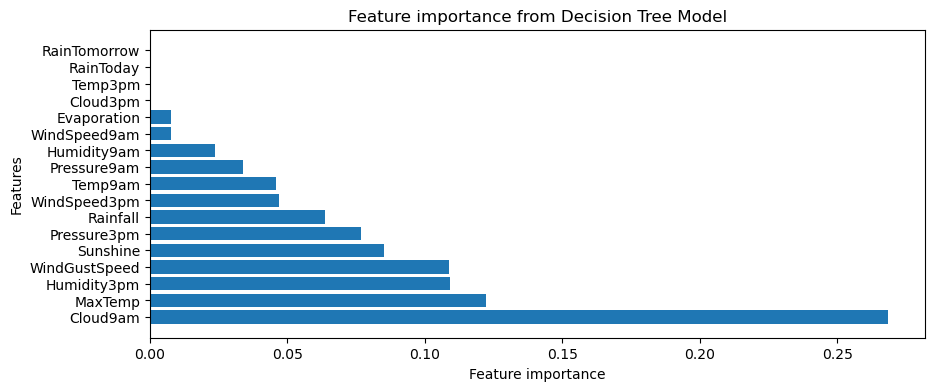

In [25]:
#중요도에 따라 내림차순으로 정렬
importance_df = importance_df.sort_values(by='importance', ascending=False)

import matplotlib.pyplot as plt
#막대 그래프로 시각화
plt.figure(figsize=(10,4))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('Feature importance from Decision Tree Model')
plt.show()

In [26]:
#Cloud9am이 가장 중요한 것을 직관적으로 볼 수 있다.

In [27]:
#상관계수를 사용할 수도 있음

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.749129  0.193628     0.645536  0.026204   
MaxTemp        0.749129  1.000000 -0.083156     0.686963  0.450509   
Rainfall       0.193628 -0.083156  1.000000    -0.016294 -0.153724   
Evaporation    0.645536  0.686963 -0.016294     1.000000  0.318624   
Sunshine       0.026204  0.450509 -0.153724     0.318624  1.000000   
WindGustSpeed  0.193888  0.077891  0.094433     0.272218  0.077254   
WindSpeed9am   0.124886 -0.230203  0.230233     0.065997 -0.075932   
WindSpeed3pm  -0.091393 -0.194584  0.047699     0.038100  0.058813   
Humidity9am   -0.201467 -0.353708  0.148924    -0.520663 -0.494669   
Humidity3pm   -0.034757 -0.531677  0.289565    -0.389350 -0.759553   
Pressure9am   -0.488458 -0.270016 -0.333185    -0.370194  0.022184   
Pressure3pm   -0.484732 -0.362449 -0.247216    -0.381518 -0.022580   
Cloud9am       0.210319 -0.178331  0.170330    -0.109862 -0.687410   
Temp9am        0.917

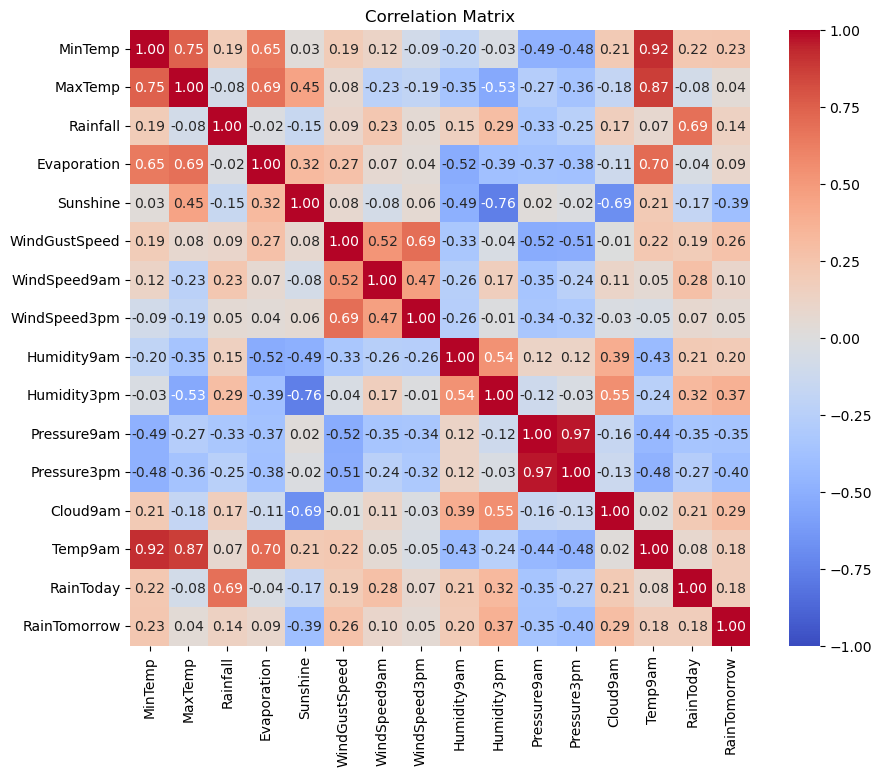

In [28]:
# 상관계수 계산
corr_matrix = df.corr()

# 상관계수 출력
print(corr_matrix)

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Input 변수(X)와 Output 변수(y) 구분
X = np.array(df.iloc[:,:-1])
y = np.array(df['RainTomorrow'])

In [30]:
# 트레이닝 셋트와 테스트 셋트로 데이터 구분(여기서는 7:3으로 구분)
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (247, 15)
y_train 크기: (247,)
X_test 크기: (106, 15)
y_test 크기: (106,)


<Axes: ylabel='count'>

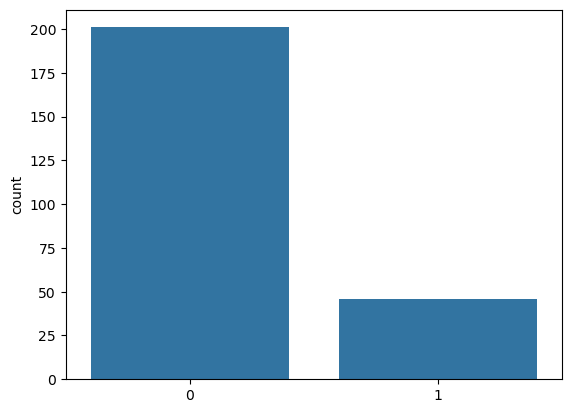

In [31]:
#데이터에 불균형이 있었는지 확인

import matplotlib.pyplot as plot
import seaborn as sns

sns.countplot(x=y_train)
#밸런싱 비교는 train 할 거고, test는 손 안댐. y데이터 확인 = y_train 
#꼭 그래프를 그려야 하는 건 아님. value_counts()로 확인해도 됨

In [32]:
#대체한 부분

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train,y_train)

print("X_train_balanced 크기:", X_train_balanced.shape)
print("y_train_balanced 크기:", y_train_balanced.shape)

X_train_balanced 크기: (402, 15)
y_train_balanced 크기: (402,)


<Axes: ylabel='count'>

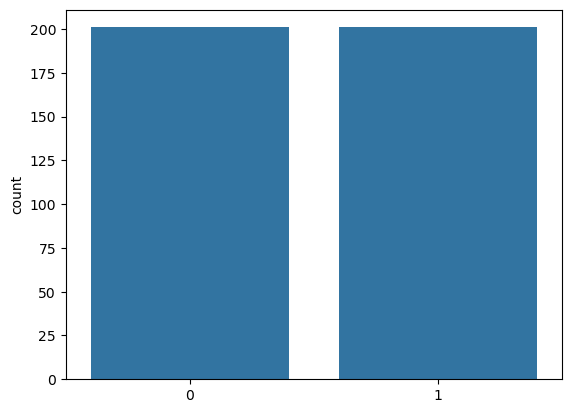

In [33]:
sns.countplot(x=y_train_balanced)

In [34]:
train_scores, test_scores = list(), list()
# train_score와 test_score의 정확도를 저장 장소
# train_score는 훈련데이터에 특화될수록 증가
# test_score는 테스트데이터에 일반화될수록 증가

In [35]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 의사결정나무모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier

#의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    df = DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 의사결정나무 모델 적합
    df.fit(X_train, y_train)
    
    #training dataset 정확도 평가
    train_att = df.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att = df.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.818, test: 0.802
>2, train: 0.879, test: 0.849
>3, train: 0.911, test: 0.830
>4, train: 0.947, test: 0.830
>5, train: 0.976, test: 0.840
>6, train: 0.992, test: 0.811
>7, train: 0.996, test: 0.840
>8, train: 1.000, test: 0.821
>9, train: 1.000, test: 0.811
>10, train: 1.000, test: 0.830
>11, train: 1.000, test: 0.811
>12, train: 1.000, test: 0.783
>13, train: 1.000, test: 0.830
>14, train: 1.000, test: 0.821
>15, train: 1.000, test: 0.811
>16, train: 1.000, test: 0.792
>17, train: 1.000, test: 0.802
>18, train: 1.000, test: 0.811
>19, train: 1.000, test: 0.802


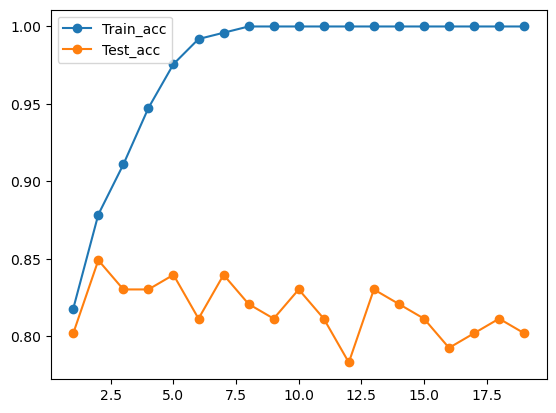

In [36]:
#그래프 그리기

from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()

In [37]:
# 그래프만으로는 최적의 깊이를 가늠하기 어려움
#test_scores에서 최고 점수의 인덱스를 찾아 최적의 깊이 확인
optimal_depth = np.argmax(test_scores) + 1  # 0부터 시작하므로 +1
optimal_test_acc = max(test_scores)  # 최고 테스트 정확도

print(f"최적의 깊이는: {optimal_depth}")

최적의 깊이는: 2


In [38]:
# 의사결정나무모델에 SMOTE 적용한 데이터 적합(fitting)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=2)  #max_depth 2로 지정
tree.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [39]:
#모델 성능 평가
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0]
실제값
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]


In [40]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)
# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함.

#원핫인코딩, 상관계수, 의사결정나무 깊이 최적화했을 때의 정확도
print('정확도: ', format(temp_acc))

정확도:  0.7924528301886793


In [41]:
#60211356 장유진

In [42]:
tree.predict_proba(X_test)[:,1]

array([0.1056338 , 0.1056338 , 0.1056338 , 0.1056338 , 0.26415094,
       0.8125    , 0.26415094, 0.26415094, 0.83246073, 0.83246073,
       0.1056338 , 0.1056338 , 0.1056338 , 0.1056338 , 0.1056338 ,
       0.1056338 , 0.1056338 , 0.26415094, 0.26415094, 0.1056338 ,
       0.83246073, 0.8125    , 0.83246073, 0.1056338 , 0.1056338 ,
       0.1056338 , 0.83246073, 0.83246073, 0.26415094, 0.83246073,
       0.1056338 , 0.1056338 , 0.26415094, 0.1056338 , 0.1056338 ,
       0.1056338 , 0.1056338 , 0.1056338 , 0.83246073, 0.26415094,
       0.83246073, 0.1056338 , 0.1056338 , 0.26415094, 0.26415094,
       0.1056338 , 0.1056338 , 0.83246073, 0.83246073, 0.1056338 ,
       0.83246073, 0.26415094, 0.83246073, 0.8125    , 0.1056338 ,
       0.26415094, 0.1056338 , 0.1056338 , 0.83246073, 0.8125    ,
       0.26415094, 0.83246073, 0.1056338 , 0.83246073, 0.26415094,
       0.83246073, 0.1056338 , 0.1056338 , 0.1056338 , 0.83246073,
       0.1056338 , 0.1056338 , 0.1056338 , 0.83246073, 0.10563

In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

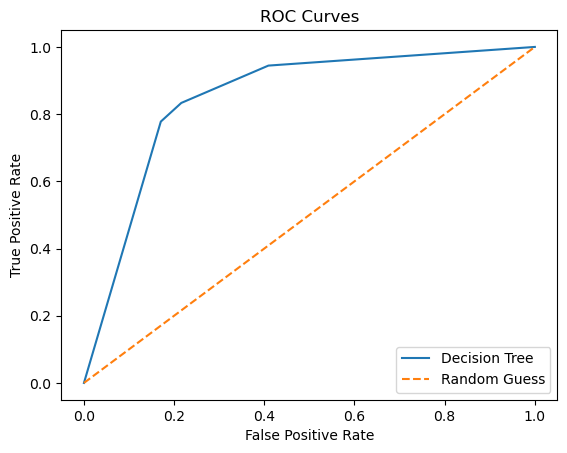

In [86]:
#ROC curve 그래프 그리기
plt.plot(fpr, tpr, '-', ms=2, label="Decision Tree")
plt.plot([0,1], [0,1], '--', label="Random Guess")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [88]:
#AUC 계산
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Curve : %0.2f' % roc_auc)

Area Under Curve : 0.85


In [90]:
#60211356 장유진